# Polynômes admettant les racines n ième de l'unité 

On veut chercher les groupes de Galois des polynômes de type : 

$X^p-1=0$ avec $p$ un nombre premier.

In [1]:
%display latex

#### Avant de commencer
Ajout de quelque outils qui vont nous servir

In [2]:
import networkx as nx
import hashlib

In [3]:
#génarateur de couleurs 
def generateurcouleurs(i):
    hex_dig=hashlib.md5(str(i).encode()).hexdigest()
    return f"#{hex_dig[:6]}"

### Outils qui vont nous servir

In [4]:
PRQ.<X> = PolynomialRing(QQ)
PRR.<Y> = PolynomialRing(RR)
var('x') #pour les affichages

x

In [27]:
#Fonction qui génère le polynôme 
def Generateur(p):
    return X^p - 1

def Generateur_r(p):
    return Y^p - 1

## Affichages et recherche des racines réelles 
On va commencer par afficher les polynôme avec $p$ allant de 1 à 20, si $p$ est un nombre premier bien sûr

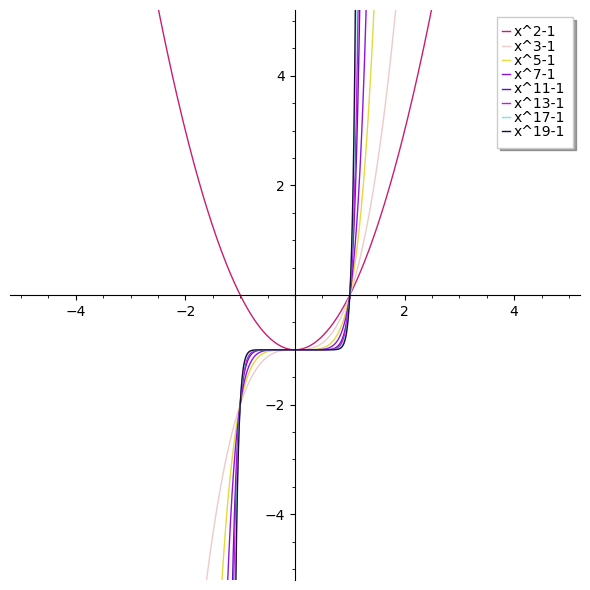

In [39]:
tracés = []

for i in range(1,21):
    if is_prime(i):
        couleur = generateurcouleurs(i)
        tracé = plot(x^i-1,(x,-5,5),
                     ymin=-5,ymax=5,
                    color=couleur,
                    legend_label=f'x^{i}-1')
        tracés.append(tracé)

tracé = sum(tracés)
tracé.show(figsize=(6,6))

On remarque que pour $p=2$, alors le polynôme $X^2-1$ admet deux racines réelles évidentes 1 et -1.

Dans les autres cas, le polynôme $X^p-1$ semble admettre une seule racine réelle 1.

In [11]:
Polynômes = []

for i in range(1,21):
    if is_prime(i):
        Polynômes.append(Generateur(i))

for P in Polynômes:
    print(P.roots())

[(1, 1), (-1, 1)]
[(1, 1)]
[(1, 1)]
[(1, 1)]
[(1, 1)]
[(1, 1)]
[(1, 1)]
[(1, 1)]


Ce qui confirme ce que l'on a supposé ci dessus.

In [15]:
for P in Polynômes :
    if P.is_irreducible():
        print(P," est irréductible")
    else:
        print(P," n'est pas irréductible")

X^2 - 1  n'est pas irréductible
X^3 - 1  n'est pas irréductible
X^5 - 1  n'est pas irréductible
X^7 - 1  n'est pas irréductible
X^11 - 1  n'est pas irréductible
X^13 - 1  n'est pas irréductible
X^17 - 1  n'est pas irréductible
X^19 - 1  n'est pas irréductible


In [16]:
for P in Polynômes :
    print(P," = ",P.factor())

X^2 - 1  =  (X - 1) * (X + 1)
X^3 - 1  =  (X - 1) * (X^2 + X + 1)
X^5 - 1  =  (X - 1) * (X^4 + X^3 + X^2 + X + 1)
X^7 - 1  =  (X - 1) * (X^6 + X^5 + X^4 + X^3 + X^2 + X + 1)
X^11 - 1  =  (X - 1) * (X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1)
X^13 - 1  =  (X - 1) * (X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1)
X^17 - 1  =  (X - 1) * (X^16 + X^15 + X^14 + X^13 + X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1)
X^19 - 1  =  (X - 1) * (X^18 + X^17 + X^16 + X^15 + X^14 + X^13 + X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1)


Elles sont toutes de la forme $P=X^p -1 =(X-1) \sum_{i=0}^{p-1} X^i$

## Travaux à propos de la théorie de Galois

On remarque que si $\varphi \in G$ avec $G$ le groupe de Galois de $P$, alors $\varphi$ fixe $1$ car $1 \in \mathbb Q$.

On en déduit que les groupes de Galois sont les mêmes pour les polynômes $X^p-1$ et $\sum_{i=0}^{p-1} X^i$

In [35]:
Polynômes = []

for i in range(1,21):
    if is_prime(i):
        P=Generateur(i)/ (X-1)
        Polynômes.append(P.numerator())

for P in Polynômes:
    if P.is_irreducible():
        print(P," est irréductible")
    else:
        print(P," n'est pas irréductible")

X + 1  est irréductible
X^2 + X + 1  est irréductible
X^4 + X^3 + X^2 + X + 1  est irréductible
X^6 + X^5 + X^4 + X^3 + X^2 + X + 1  est irréductible
X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1  est irréductible
X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1  est irréductible
X^16 + X^15 + X^14 + X^13 + X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1  est irréductible
X^18 + X^17 + X^16 + X^15 + X^14 + X^13 + X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1  est irréductible


Elles sont toutes irréductibles, on peut poursuivre.

In [36]:
for P in Polynômes:
    print(P)
    K.<alpha> = NumberField(P)
    print(K)
    G = K.galois_group()
    print(G)
    print(" ")

X + 1
Number Field in alpha with defining polynomial X + 1
Galois group 1T1 (S1) with order 1 of X + 1
 
X^2 + X + 1
Number Field in alpha with defining polynomial X^2 + X + 1
Galois group 2T1 (S2) with order 2 of X^2 + X + 1
 
X^4 + X^3 + X^2 + X + 1
Number Field in alpha with defining polynomial X^4 + X^3 + X^2 + X + 1
Galois group 4T1 (4) with order 4 of X^4 + X^3 + X^2 + X + 1
 
X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
Number Field in alpha with defining polynomial X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
Galois group 6T1 (3[x]2) with order 6 of X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
 
X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
Number Field in alpha with defining polynomial X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
Galois group 10T1 (5[x]2) with order 10 of X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
 
X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
Number Field in alpha with defining polynomial X^12 + X^11 + X^10 

In [38]:
for P in Polynômes:
    K.<alpha>=NumberField(P)
    G=K.galois_group()
    if G.is_solvable():
        print(P)
        print(G)
        print("est un groupe résolvable")
        print(" ")
    else:
        print(P)
        print(G)
        print("n'est pas résolvable")
        print(" ")

X + 1
Galois group 1T1 (S1) with order 1 of X + 1
est un groupe résolvable
 
X^2 + X + 1
Galois group 2T1 (S2) with order 2 of X^2 + X + 1
est un groupe résolvable
 
X^4 + X^3 + X^2 + X + 1
Galois group 4T1 (4) with order 4 of X^4 + X^3 + X^2 + X + 1
est un groupe résolvable
 
X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
Galois group 6T1 (3[x]2) with order 6 of X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
est un groupe résolvable
 
X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
Galois group 10T1 (5[x]2) with order 10 of X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
est un groupe résolvable
 
X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
Galois group of X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
est un groupe résolvable
 
X^16 + X^15 + X^14 + X^13 + X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 + X^4 + X^3 + X^2 + X + 1
Galois group of X^16 + X^15 + X^14 + X^13 + X^12 + X^11 + X^10 + X^9 + X^8 + X^7 + X^6 + X^5 +